In [1]:
import functions
#Populates the global namespace with the basic imports and adds the .csv to df
functions.import_all(globals())

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [38]:
#getting an idea how many rows would be dropped if I just dropped all null rows
df.isnull().any(axis=1).sum()

5835

In [39]:
#Columns that contain nulls
[col for col in df.loc[:,df.isnull().any(axis=0)].columns] 

['waterfront', 'view', 'yr_renovated']

In [40]:
#this means waterfront is a true false. We can easily replace it with categorical data eventually to be made into dummy variables
df.waterfront.value_counts()
df.waterfront.head(10)

0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: waterfront, dtype: float64

In [45]:
df.view.value_counts()
#unforunately I am not so certain what the view column is describing

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

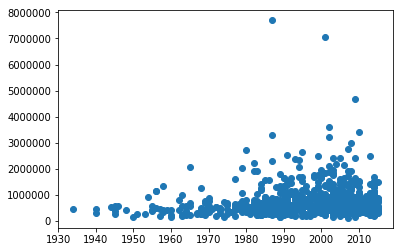

In [2]:
df.yr_renovated.value_counts()
#first remove nans and 0 (which represents null)
null_year_removed = df.copy()
null_year_removed = null_year_removed[(null_year_removed.yr_renovated != 0)]
null_year_removed = null_year_removed[(null_year_removed.yr_renovated.isna() == False)]

plt.scatter(y=null_year_removed.price,x=null_year_removed.yr_renovated)


In [4]:
#now to see if there is a reliable correlation
sm.OLS(null_year_removed.price,sm.add_constant(null_year_removed.yr_renovated)).fit().summary()
#from the low r-squared it is pretty clear to me that yr_renovated hardly explains any varience in the price. I am strongly considering dropping it completely
#let me first check if 0.0 as a value is in any way predictive

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     11.87
Date:                Sun, 05 May 2019   Prob (F-statistic):           0.000601
Time:                        18:29:27   Log-Likelihood:                -10981.
No. Observations:                 744   AIC:                         2.197e+04
Df Residuals:                     742   BIC:                         2.197e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.301e+06   2.92e+06     -3.183      0.002    -1.5e+07   -3.56e+06
yr_renovated  5045.1286   1464.139      3.446      0.001    2170.780    7919.477
==============================================================================
Omnibus:                      753.148   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46310.556
Skew:                           4.569   Prob(JB):                         0.00
Kurtosis:                      40.555   Cond. No.                     2.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
#graph for corr between yr_renovated == 0.0 and price seems to show it is also not predictive
zero_dummy_variable_df = df[df.yr_renovated.isna() == False]
zero_dummy_variable_df["zero"] = zero_dummy_variable_df.yr_renovated.apply(
    lambda yr : 1 if yr == 0.0 else 0
)
sm.OLS(zero_dummy_variable_df.price,sm.add_constant(zero_dummy_variable_df.zero)).fit().summary()

/Users/noah/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     301.6
Date:                Sun, 05 May 2019   Prob (F-statistic):           5.18e-67
Time:                        18:39:46   Log-Likelihood:            -2.5265e+05
No. Observations:               17755   AIC:                         5.053e+05
Df Residuals:                   17753   BIC:                         5.053e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.689e+05   1.34e+04     57.270      0.000    7.43e+05    7.95e+05
zero       -2.382e+05   1.37e+04    -17.368      0.000   -2.65e+05   -2.11e+05
==============================================================================
Omnibus:                    15960.097   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1018820.514
Skew:                           4.100   Prob(JB):                         0.00
Kurtosis:                      39.193   Cond. No.                         9.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

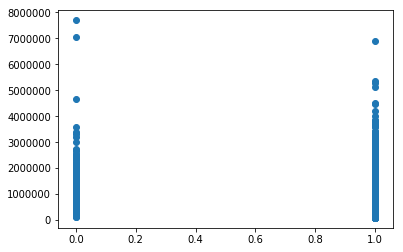

In [9]:
plt.scatter(x=zero_dummy_variable_df.zero,y=zero_dummy_variable_df.price)

In [16]:
zero_dummy_variable_df.groupby(zero_dummy_variable_df.zero).price.agg(["mean","median"])

,mean,median
zero,,
0,768901.892473,607502.0
1,530677.535536,447500.0


In [ ]:
df_cleaned = df.copy()


In [44]:
housing_df = df.copy()
housing_df["waterfront"] = housing_df.waterfront.apply(lambda val : "True" if val == 1.0 else "False" if val == 0 else "Missing")

df_cleaned = housing_df.join(pd.get_dummies(housing_df["waterfront"],prefix="waterfront"))

df_cleaned = df_cleaned.drop("waterfront_Missing",axis=1)
df_cleaned = df_cleaned.drop("waterfront",axis=1)


df_cleaned

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_False,waterfront_True
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1,0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,1,0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,...,?,1995,0.0,98003,47.3097,-122.327,2238,6819,1,0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NaN,3,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,1,0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,3,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,1,0
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,3,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,1,0


In [17]:
#Now to deal with view col
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [18]:
#The amount of missing vals is small. Now to check to see if it should be kept continuous or moved to dummy variable
sum(df.view.isna())

63

In [20]:
#To check if the values is truly continuous, I remove nan values
view_no_nan_df = df.copy()[df.view.isna()==False]

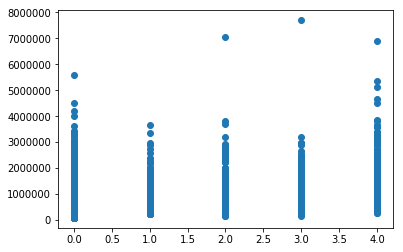

In [21]:
#No apparent correlation
plt.scatter(x=view_no_nan_df.view,y=view_no_nan_df.price)

In [24]:
groupby_views_val = view_no_nan_df.groupby("view").price.agg(["mean","median"])

In [25]:
groupby_views_val

,mean,median
view,,
0.0,4.968061e+05,432500.0
1.0,8.133733e+05,691944.0
2.0,7.913904e+05,675000.0
3.0,9.732852e+05,802500.0
4.0,1.452466e+06,1180000.0


In [31]:
[view for view in groupby_views_val.index]
[view for view in groupby_views_val.mean]

TypeError: 'method' object is not iterable

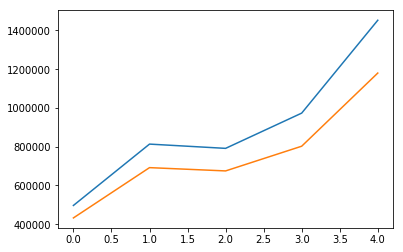

In [32]:
ax = plt.subplot()
ax.plot([view for view in groupby_views_val.index],groupby_views_val["mean"])
ax.plot([view for view in groupby_views_val.index],groupby_views_val["median"])

In [36]:
#Now what would happend to the above graph if we filled nan with the mean value?
view_mean_for_nan_df = df.copy()
view_mean_for_nan_df.view = view_mean_for_nan_df.view.fillna(view_no_nan_df.view.mean())

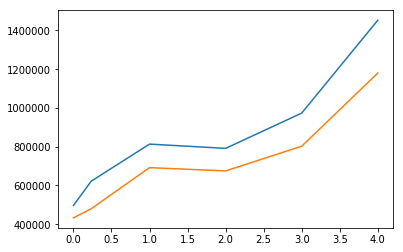

In [37]:
groupby_views_val2 = view_mean_for_nan_df.groupby("view").price.agg(["mean","median"])
ax = plt.subplot()
ax.plot(groupby_views_val2.index,groupby_views_val2["mean"])
ax.plot(groupby_views_val2.index,groupby_views_val2["median"])

In [ ]:
#it seems that filling nan's with the mean had little averse affect. Going to stick with that method